In [1]:
import numpy as np
import pandas as pd
from ase import Atoms
from ase import neighborlist
from ase import units
from ase.io.trajectory import Trajectory
import matplotlib.pyplot as plt


# Create array with forces

In [14]:
%ls

 Volume in drive D is 1000GB Harddisk
 Volume Serial Number is 42EB-1ECC

 Directory of d:\KU\Masters\Gemma_group\PUK\Python_scripts

14/12/2023  14:30    <DIR>          .
14/12/2023  14:30    <DIR>          ..
05/12/2023  16:58               479 EtOH.xyz
14/12/2023  09:12           552,521 EtOH_moldyn_NVE.traj
12/12/2023  17:37         6,619,955 EtOH_moldyn_NVT.traj
11/12/2023  13:38         5,639,113 EtOH_moldyn_NVT2.traj
27/11/2023  12:22               547 EtOH_unopt.traj
14/12/2023  14:32         1,224,183 forces_data _np.csv
14/12/2023  14:22         1,224,209 forces_data.csv
12/12/2023  11:54             1,160 Get_forces.py
03/12/2023  13:11             2,330 md.py
27/11/2023  12:32               624 opt.py
04/12/2023  10:37               648 opt_EtOH.py
14/12/2023  14:14           135,190 plots.ipynb
03/12/2023  13:11    <DIR>          Specific_scripts
04/12/2023  10:36               359 submit_gpaw.py
27/11/2023  13:22               372 submit_gpaw.txt
02/12/2023  16:02        

In [4]:
force_df = pd.read_csv("Moldyn_dataframe.csv")

force_df.head(10)


,Unnamed: 0,C1(x),C1(y),C1(z),C2(x),C2(y),C2(z),O(x),O(y),O(z),...,H3(z),H4(x),H4(y),H4(z),H5(x),H5(y),H5(z),H6(x),H6(y),H6(z)
0,0,-0.229430,-0.523297,0.258672,-0.925789,0.766458,0.429943,0.037523,2.163395,-0.654704,...,1.143886,-0.353461,-1.341176,-1.205567,1.234753,-0.771565,1.102231,-0.758847,-1.436881,0.908092
1,1,0.217437,-0.629981,0.461070,-0.076792,0.829330,0.960107,-0.441265,1.584848,-0.167655,...,0.933147,-0.507925,-1.576013,-1.384773,0.798906,-0.502513,0.666985,-0.404078,-0.884455,0.494575
2,2,0.636566,-0.617423,0.563411,0.709366,0.743905,1.355515,-0.907183,0.984895,0.332071,...,0.658012,-0.600336,-1.672782,-1.445348,0.322080,-0.237359,0.253941,-0.047711,-0.331598,0.072479
3,3,0.955058,-0.501623,0.567160,1.406015,0.514866,1.560019,-1.312727,0.423304,0.787140,...,0.354289,-0.630309,-1.617748,-1.365245,-0.120311,0.010549,-0.111934,0.269708,0.199095,-0.304178
4,4,1.137175,-0.315471,0.489652,1.985164,0.174148,1.556995,-1.641114,-0.065871,1.165967,...,0.061104,-0.613654,-1.417005,-1.163228,-0.522989,0.228366,-0.398469,0.518081,0.638897,-0.601830
5,5,1.180191,-0.098611,0.359056,2.443314,-0.221178,1.381641,-1.886281,-0.471834,1.460976,...,-0.211361,-0.556703,-1.117888,-0.864490,-0.858887,0.412691,-0.615895,0.691423,0.977074,-0.821807
6,6,1.105985,0.114777,0.207501,2.825111,-0.616649,1.078744,-2.047246,-0.794395,1.674622,...,-0.464683,-0.479439,-0.747835,-0.494121,-1.152453,0.557833,-0.762854,0.793545,1.241826,-0.974366
7,7,0.944706,0.299678,0.059137,3.119933,-0.989793,0.702574,-2.136930,-1.036625,1.811739,...,-0.653380,-0.403589,-0.372500,-0.113169,-1.382036,0.658514,-0.848568,0.831810,1.411705,-1.052612
8,8,0.726361,0.442599,-0.069251,3.342219,-1.296712,0.302740,-2.161787,-1.204367,1.874548,...,-0.806546,-0.334554,-0.004260,0.263417,-1.557730,0.733609,-0.889457,0.805575,1.502203,-1.066615
9,9,0.473188,0.538236,-0.170374,3.514961,-1.505101,-0.093590,-2.117753,-1.300272,1.864257,...,-0.908505,-0.279216,0.313125,0.597057,-1.681252,0.784879,-0.887094,0.735526,1.504497,-1.009517


In [6]:
traj = Trajectory("EtOH_moldyn_vel_test.traj")
oxygen_x_force = np.zeros(len(traj))
for i, atoms in enumerate(traj):
    oxygen_x_force[i] = atoms.get_forces()[2,0]
time = np.arange(0, len(traj))*2+0

ValueError: buffer is smaller than requested size

# Plot

In [8]:
print(force_df['Unnamed: 0'])

0        0
1        1
2        2
3        3
4        4
      ... 
296    296
297    297
298    298
299    299
300    300
Name: Unnamed: 0, Length: 301, dtype: int64


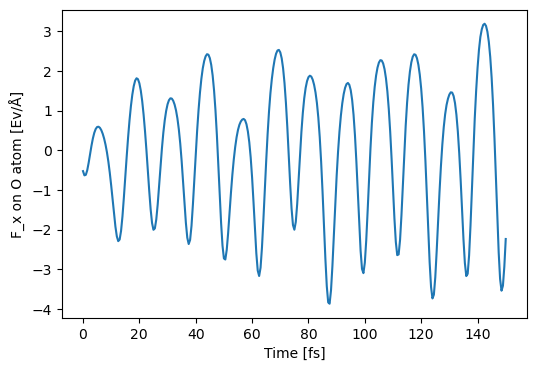

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(force_df['Unnamed: 0']*0.5, force_df['C1(y)'])
ax.set_xlabel("Time [fs]")
ax.set_ylabel("F_x on O atom [Ev/Å]")
plt.show()

In [35]:
print(len(traj))

16


144
146
148
151
155
157
159
160
164
167
170
173
175
176
178
180
181
182
183
186
188
191
192
193
194
195
197
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
288
291
295
296
304
306
311
313
315
318
323
326
328
332
336
338
343
346
350
351
359
365
368
398
399
400
401
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
464
468
474
477
478
479
485
493
506
507
508
509
510
511
516
550
551
570
579
582
585
591
594
597
598
601
603
611
612
618
619
622
625
629
631
634
638
640
643
644
645
666
667
668
669
670
671
672


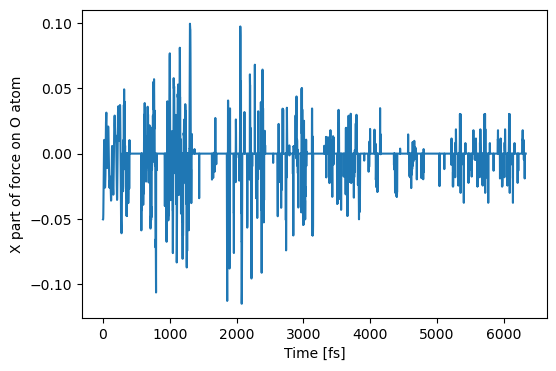

In [32]:
oxygen_x_force = np.zeros(len(traj))

for i in range(len(traj)):
    try:
        oxygen_x_force[i] = traj[i].get_forces()[2,0]
    except:
        print(i)

time = np.arange(0, len(traj))*2+0

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(time, oxygen_x_force)
ax.set_xlabel("Time [fs]")
ax.set_ylabel("X part of force on O atom")
plt.show()